<div align="center"><a href="https://colab.research.google.com/github/deepkapha/EarthScanWebinar/blob/main/notebook/W2W_dataset_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></div>

In [1]:
import sys 
sys.path.append('..')

# 1. Import the necessaary libraries

In [2]:
import os
import csv
import gdown
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
# from PIL import Image
from os.path import join as pjoin
from utils.well_log_plots import log_plots
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_columns', 500)
overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

# 2. Download the dataset from publicly avalialable google drive link

In [4]:
train_data_url = 'https://drive.google.com/file/d/1TkRT5TeX7slPDL20OqYqFLhGX5iK4RHc/view?usp=share_link'
test_data_url = 'https://drive.google.com/file/d/1ooDiCKweUrduyy0Q1P7KIXnl04BQqH0_/view?usp=share_link'

data_root = '../raw_data'
os.makedirs(data_root, exist_ok = True)
train_path = pjoin(data_root, "train.csv")
test_path = pjoin(data_root, "test.csv")

In [5]:
gdown.download(url=train_data_url, output=train_path, quiet=False, fuzzy=True)
gdown.download(url=test_data_url, output=test_path, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1TkRT5TeX7slPDL20OqYqFLhGX5iK4RHc
To: c:\Users\M Quamer Nasim\Desktop\EarthScanWebinar\raw_data\train.csv
100%|██████████| 280M/280M [00:10<00:00, 26.3MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1ooDiCKweUrduyy0Q1P7KIXnl04BQqH0_
To: c:\Users\M Quamer Nasim\Desktop\EarthScanWebinar\raw_data\test.csv
100%|██████████| 31.8M/31.8M [00:00<00:00, 35.8MB/s]


'../raw_data\\test.csv'

# 3. 

In [ ]:
start_well=30
end_well=98

In [10]:
def load_data(path, delimiter = ';'):

    """
    Loads a CSV file from the given path and returns a pandas DataFrame.

    Parameters:
    -----------
    path : str
        The path of the CSV file to load.
    delimiter : str, optional (default ';')
        The delimiter used in the CSV file to separate values.

    Returns:
    --------
    pandas.DataFrame
        The DataFrame containing the data loaded from the CSV file.
    """

    return pd.read_csv(path, delimiter = delimiter)

well_train = load_data(train_path)
well_test = load_data(test_path)

In [8]:
print("Shape of Well data:\n\tTraining Well: {}\n\tTesting Well: {}".format(well_train.shape, well_test.shape))

Shape of Well data:
	Training Well: (1170511, 29)
	Testing Well: (136786, 27)


# Description of dataset

The provided dataset contains well logs, interpreted lithofacies and lithostratigraphy for 90+ released wells from offshore Norway. The well logs include the well name (WELL), the measured depth, x,y,z location for the wireline measurement as well as the well logs CALI, RDEP, RHOB, DHRO, SGR,  GR, RMED, RMIC, NPHI, PEF, RSHA, DTC, SP, BS, ROP, DTS, DCAL, MUDWEIGHT. An explanation of the abbreviations is shown in the figure below. 

<center>
<img src="../asset/well_log_abbreviations.png">
</center>

Click [here](https://drive.google.com/drive/folders/1GIkjq4fwgwbiqVQxYwoJnOJWVobZ91pL) to check the results.

Given below is the Statistical description of the few important logs from the raw_data


| Log Name | min_scale | max_scale | description |
|----------|-----------|-----------|-------------|
| CALI     |  6        |   24      |             |
| GR       |  0        |   150     |             |
| SP       |  -150     |   150     |             |
| SGR      |  0        |   150     |             |
| RSHA     |  0.2      |   200     |             |
| RMED     |  0.2      |   200     |             |
| RDEP     |  0.2      |   200     |             |
| RMIC     |  0.2      | 200 ohm-m |             |
| RXO      |  0.2      | 200 ohm-m |             |                 
| ROPA     |   0       |    50     |             |
| ROP      |   0       |    50     |             |
| DTC      |   40       |  240      |             |
| DTS      |   40       |  240      |             |
| NPHI     |   0.05    |  -0.15    |             |
| RHOB     |   0.95    |   2.95    |             |
| PEF      |  0        |10 barns/electron|       |             
| DCAL     |  6        |    24     |             |
| DRHO     |  -0.2     |   1       |             |
|MUDWEIGHT |    0       |  150         |             |
|BS        |     6      |    24       |             |

In [9]:
def count_well(data):

    """
    Counts the number of unique well IDs in the given pandas DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        The DataFrame containing the well IDs to count.

    Returns:
    --------
    int
        The number of unique well IDs in the DataFrame.
    """

    return data.WELL.value_counts().shape[0]

total_training_wells = count_well(well_train)
total_testing_wells = count_well(well_test)

print('Total number of wells present in the dataset:\n\tTraining Well: {}\n\tTesting Well: {}'.format(total_training_wells, total_testing_wells))

Total number of wells present in the dataset:
	Training Well: 98
	Testing Well: 10


In [16]:
print(f"Unique wells present in the dataset are:\n\t{well_train.WELL.unique()}")

Unique wells present in the dataset are:
	['15/9-13' '15/9-15' '15/9-17' '16/1-2' '16/1-6 A' '16/10-1' '16/10-2'
 '16/10-3' '16/10-5' '16/11-1 ST3' '16/2-11 A' '16/2-16' '16/2-6' '16/4-1'
 '16/5-3' '16/7-4' '16/7-5' '16/8-1' '17/11-1' '25/11-15' '25/11-19 S'
 '25/11-5' '25/2-13 T4' '25/2-14' '25/2-7' '25/3-1' '25/4-5' '25/5-1'
 '25/5-4' '25/6-1' '25/6-2' '25/6-3' '25/7-2' '25/8-5 S' '25/8-7' '25/9-1'
 '26/4-1' '29/6-1' '30/3-3' '30/3-5 S' '30/6-5' '31/2-1' '31/2-19 S'
 '31/2-7' '31/2-8' '31/2-9' '31/3-1' '31/3-2' '31/3-3' '31/3-4' '31/4-10'
 '31/4-5' '31/5-4 S' '31/6-5' '31/6-8' '32/2-1' '33/5-2' '33/6-3 S'
 '33/9-1' '33/9-17' '34/10-19' '34/10-21' '34/10-33' '34/10-35' '34/11-1'
 '34/11-2 S' '34/12-1' '34/2-4' '34/3-1 A' '34/4-10 R' '34/5-1 A'
 '34/5-1 S' '34/7-13' '34/7-20' '34/7-21' '34/8-1' '34/8-3' '34/8-7 R'
 '35/11-1' '35/11-10' '35/11-11' '35/11-12' '35/11-13' '35/11-15 S'
 '35/11-6' '35/11-7' '35/12-1' '35/3-7 S' '35/4-1' '35/8-4' '35/8-6 S'
 '35/9-10 S' '35/9-2' '35/9-5' '35/

In [17]:
def get_well_names(data):
    """
    Returns a list of unique well names in the given pandas DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        The DataFrame containing the well names to return.

    Returns:
    --------
    list
        A list of unique well names in the DataFrame.
    """

    return list(data.WELL.value_counts().index)

well_train_names = get_well_names(well_train)
well_test_names = get_well_names(well_test)

In [18]:
def get_overlapping_well(training_data, testing_data):
    """
    Finds the number and names of wells that overlap between two pandas DataFrames.

    Parameters:
    -----------
    training_data : pandas.DataFrame
        The DataFrame containing the training well data.
    testing_data : pandas.DataFrame
        The DataFrame containing the testing well data.

    Returns:
    --------
    tuple
        A tuple containing two values:
        - The number of testing wells that overlap with training wells.
        - A list of the names of the testing wells that overlap with training wells.
          If no testing wells overlap with training wells, this value is None.
    """

    count_overlapping_well = 0
    overlapped_well = []
    for well in get_well_names(testing_data):
        if well in get_well_names(training_data) == True:
            count_overlapping_well+=1
            overlapped_well.append(well)
        if count_overlapping_well !=0:
            print("Total numbers of testing wells overlapping in training wells: {} and their names are {}".format(count_overlapping_well, overlapped_well))
            return (count_overlapping_well, overlapped_well)
        else:
            print("Total numbers of testing wells overlapping in training wells: {}".format(count_overlapping_well))
            return (count_overlapping_well, None)

overlapped_well_count, overlapped_well_name = get_overlapping_well(well_train, well_test)

Total numbers of testing wells overlapping in training wells: 0


In [19]:
well_train.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [20]:
print("Max mud weight value is",np.max(well_train["MUDWEIGHT"]))
print("Max mud weight value is",np.min(well_train["MUDWEIGHT"]))

Max mud weight value is 185.73092651
Max mud weight value is 0.1258177161


In [21]:
well_test.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,1.513937,2.171173,72.078377,NaN,0.551575,55.815659,174.347092,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,1.480188,2.171840,72.147697,NaN,0.547566,41.862537,176.112915,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,1.469700,2.161303,75.074219,NaN,0.551840,38.587872,177.662476,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,1.469341,2.151947,80.735229,NaN,0.552511,41.417999,177.437714,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,1.466462,2.143010,81.665024,NaN,0.566789,49.471237,176.797653,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


In [22]:
def get_random_well(data, seed = None):
    """
    Returns a random well from the given pandas DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        The DataFrame containing the wells to choose from.
    seed : int or None, optional (default None)
        The random seed to use for generating the well index. If None, the random
        number generator is not seeded.

    Returns:
    --------
    pandas.DataFrame
        A DataFrame containing the data for a random well chosen from the input DataFrame.
    """

    if seed:
        np.random.seed(seed)
    rand_well_index = np.random.randint(0, count_well(data))
    rand_well_name = get_well_names(data)[rand_well_index]
    print('Displaying information for Well {}'.format(rand_well_name))
    rand_well_data = data[data['WELL'] == rand_well_name]

    return rand_well_data

get_random_well(well_train, 2020).head()

Displaying information for Well 7/1-2 S


,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
1168471,7/1-2 S,2859.9924,444920.28125,6421580.5,-2799.143311,TYNE GP.,Mandal Fm.,8.728068,1.158282,1.141734,1.240302,NaN,257.011993,NaN,NaN,NaN,NaN,NaN,12.250001,29.118109,NaN,NaN,NaN,NaN,NaN,22.638025,NaN,65000,2.0
1168472,7/1-2 S,2860.1444,444920.28125,6421580.5,-2799.295410,TYNE GP.,Mandal Fm.,8.741534,1.122814,1.122354,1.229349,NaN,252.575577,NaN,NaN,NaN,NaN,NaN,12.250001,29.106216,NaN,NaN,NaN,NaN,NaN,23.431324,NaN,65000,2.0
1168473,7/1-2 S,2860.2964,444920.28125,6421580.5,-2799.447510,TYNE GP.,Mandal Fm.,8.739483,1.204416,1.208588,1.246152,NaN,263.705017,NaN,NaN,NaN,NaN,NaN,12.250001,29.087978,NaN,NaN,NaN,NaN,NaN,24.401089,NaN,65000,2.0
1168474,7/1-2 S,2860.4484,444920.28125,6421580.5,-2799.599609,TYNE GP.,Mandal Fm.,8.739040,1.213172,1.226264,1.235385,NaN,272.152985,NaN,NaN,NaN,NaN,NaN,12.250001,29.076694,NaN,NaN,NaN,NaN,NaN,25.371424,NaN,65000,2.0
1168475,7/1-2 S,2860.6004,444920.28125,6421580.5,-2799.751465,TYNE GP.,Mandal Fm.,8.744128,1.008474,1.013111,1.140845,NaN,270.512115,NaN,NaN,NaN,NaN,NaN,12.250001,29.061005,NaN,NaN,NaN,NaN,NaN,26.339930,NaN,65000,2.0


In [23]:
def percet_missing_data(dataframe):
    """
    Calculates the percentage of missing values in each column of the given pandas DataFrame.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame to calculate missing values for.

    Returns:
    --------
    pandas.Series
        A Series object with the percentage of missing values for each column in the input DataFrame.
    """
    
    return dataframe.isna().sum()/dataframe.shape[0]*100

Displaying %age of missing data points for all columns in training data

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.920538
Y_LOC                                 0.920538
Z_LOC                                 0.920538
GROUP                                 0.109183
FORMATION                            11.703777
CALI                                  7.507576
RSHA                                 46.121822
RMED                                  3.331280
RDEP                                  0.941042
RHOB                                 13.777658
GR                                    0.000000
SGR                                  94.074981
NPHI                                 34.608987
PEF                                  42.615490
DTC                                   6.908350
SP                                   26.164983
BS                                   41.678720
ROP                               

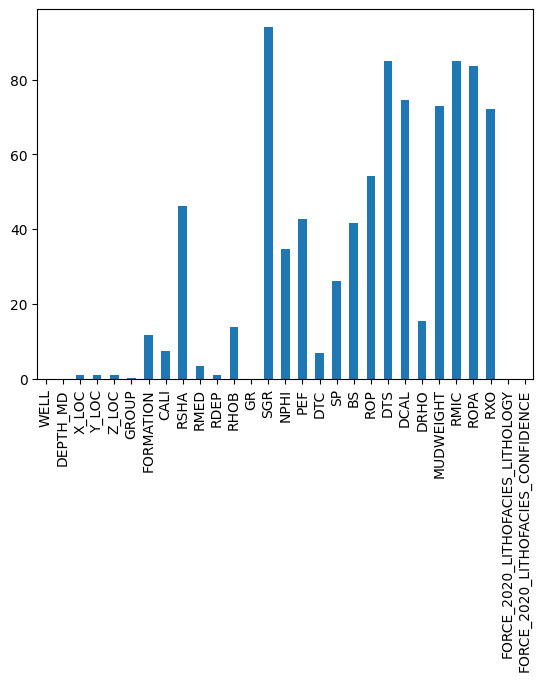



Displaying %age of missing data points for all columns in testing data

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          0.043133
Y_LOC          0.043133
Z_LOC          0.043133
GROUP          0.000000
FORMATION      5.171582
CALI           4.126884
RSHA          71.417397
RMED           0.429137
RDEP           0.043133
RHOB          12.398930
GR             0.000000
SGR          100.000000
NPHI          23.937391
PEF           17.021479
DTC            0.601670
SP            51.291068
BS            51.044698
ROP           50.056292
DTS           68.403199
DCAL          90.119603
DRHO          18.444870
MUDWEIGHT     85.181963
RMIC          91.727224
ROPA          59.213662
RXO           78.179053
dtype: float64


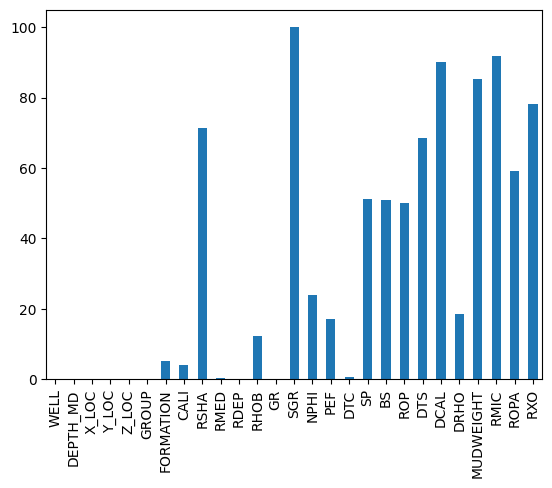

In [28]:
print('Displaying %age of missing data points for all columns in training data\n')
print(percet_missing_data(well_train))
percet_missing_data(well_train).plot(kind='bar')
plt.show()
print('\n' + '='*80 + '\n\nDisplaying %age of missing data points for all columns in testing data\n')
print(percet_missing_data(well_test))
percet_missing_data(well_test).plot(kind='bar')
plt.show()

In [ ]:
#def remove_column_with_half_of_nan_value(data):

#    print("Removing columns which have 50% of missing data i.e., 'SGR', 'ROP', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'BS', 'DRHO'")
#    data.drop(['SGR', 'ROP', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'BS', 'DRHO'], axis = 1, inplace = True)

#remove_column_with_half_of_nan_value(well_train)
#remove_column_with_half_of_nan_value(well_test)

In [ ]:
def group_identification(data):

    value_counts = data.GROUP.value_counts()
    print('Displaying all the GROPUs available in the dataset\nTotal {} GROUPS found in the dataset'.format(value_counts.count()))
    print(value_counts)
    return value_counts.index

training_group_names = group_identification(well_train)
print()
testing_group_names = group_identification(well_test)

In [ ]:
def get_nonoverlapping_groups(train_group, test_group):

    count_nonoverlapping_groups = 0
    nonoverlapped_groups = []
    for group in test_group:
        if (group in train_group) == False:
            count_nonoverlapping_groups+=1
            nonoverlapped_groups.append(well)
        if count_nonoverlapping_groups !=0:
            print("Total numbers of GROUPS in testing wells that is not overlapping in training wells: {} and their names are {}".format(count_nonoverlapping_groups, nonoverlapped_groups))
            return (count_nonoverlapping_groups, nonoverlapped_groups)
        else:
            print("Total numbers of GROUPS in testing wells that is not overlapping in training wells: {}".format(count_nonoverlapping_groups))
            return (count_nonoverlapping_groups, None)

nonoverlapped_groups_count, nonoverlapped_groups_name = get_nonoverlapping_groups(training_group_names, testing_group_names)

In [ ]:
def missing_group_info(data):
    print('Total data points with missing Group information: {}'.format(data.GROUP.isna().sum()))

missing_group_info(well_train)
missing_group_info(well_test)

In [ ]:
def remove_formation_column(data):

    print('Removing FORMATION column from the dataset')
    data.drop(['FORMATION'], axis = 1, inplace = True)

In [ ]:
remove_formation_column(well_train)
remove_formation_column(well_test)

In [ ]:
well_train.head()

In [ ]:
well_test.head()

In [ ]:
get_random_well(well_train, 2020).head()

In [ ]:
def get_undeviated_well_info(data):
    well_names = []
    for well_name in get_well_names(data):
        well_data = data[data.WELL == well_name]
        if (well_data.X_LOC.value_counts().shape[0] == 1) and (well_data.Y_LOC.value_counts().shape[0] == 1):
            well_names.append(well_name)
            
    print('Total Number of undeviated wells present in the dataset is {} and their names are:\n{}'.format(len(well_names), 
                                                                                                          well_names))
    return well_names

In [ ]:
undeviated_wells = get_undeviated_well_info(well_train)

In [ ]:
def plot3Dlocation(rand_well):
    x_loc = rand_well.X_LOC
    y_loc = rand_well.Y_LOC
    z_loc = np.abs(rand_well.Z_LOC)

    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')
    ax.plot3D(x_loc, y_loc, np.abs(z_loc))

    ax.plot3D(x_loc.values[0], y_loc.values[0], z_loc.values[0], marker='s', color='black', ms=8)
    ax.plot3D(x_loc.values[-1], y_loc.values[-1], z_loc.values[-1], marker='*', color='red', ms=8)
    ax.set_xlabel('X Location')
    ax.set_ylabel('Y Location')
    ax.set_zlabel('TVD')
    ax.invert_zaxis()
    plt.show()

In [ ]:
def plot2Dlocation(rand_well):
    x_loc = rand_well.X_LOC
    y_loc = rand_well.Y_LOC
    z_loc = np.abs(rand_well.Z_LOC)

    _, ax = plt.subplots(1, 3, figsize = (20, 5))

    ax[0].plot(x_loc, y_loc)
    ax[0].set_title('X Location vs Y Location')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')

    ax[1].plot(x_loc, z_loc)
    ax[1].set_title('X Location vs TVDss')
    ax[1].set_xticks([])
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('TVDss')
    ax[1].plot(x_loc.values[0], z_loc.values[0], marker='s', color='black', ms=8)
    ax[1].plot(x_loc.values[-1], z_loc.values[-1], marker='*', color='red', ms=8)
    ax[2].invert_yaxis()

    ax[2].plot(y_loc, z_loc)
    ax[2].set_title('Y Location vs TVDss')
    ax[2].set_xticks([])
    ax[2].set_xlabel('Y')
    ax[2].set_ylabel('TVDss')
    ax[2].plot(y_loc.values[0], z_loc.values[0], marker='s', color='black', ms=8)
    ax[2].plot(y_loc.values[-1], z_loc.values[-1], marker='*', color='red', ms=8)
    ax[2].invert_yaxis()
    plt.show()

In [ ]:
rand_well = get_random_well(well_train)
plot2Dlocation(rand_well)
plot3Dlocation(rand_well)

In [ ]:
def get_well_with_no_group_info(data, total_num_wells, well_names):

    well_with_missing_group_info = []

    for well_names_index in range(total_num_wells):
        single_well_name = well_names[well_names_index]
        single_well_data = data[data['WELL'] == single_well_name]
        total_group_data_missing = single_well_data.GROUP.isna().sum()
        if total_group_data_missing != 0:
            print('Well "{0}" is having missing information on GROUP and total data points missing this information is {1}'.format(single_well_name, total_group_data_missing))
            well_with_missing_group_info.append(single_well_name)
    print('\nTotal {} Wells have missing group information!'.format(len(well_with_missing_group_info)))
    return well_with_missing_group_info

well_train_with_missing_group_info = get_well_with_no_group_info(well_train, total_training_wells, well_train_names)
well_test_with_missing_group_info = get_well_with_no_group_info(well_test, total_testing_wells, well_test_names)

In [ ]:
def fill_group_na_value(data, well_name, method = 'bfill'):
    return data[data['WELL'] == well_name].GROUP.fillna(method = method)

In [ ]:
well_train.GROUP.loc[well_train[well_train['WELL'] == well_train_with_missing_group_info[0]].GROUP.index] = fill_group_na_value(well_train, well_train_with_missing_group_info[0])
well_train.GROUP.loc[well_train[well_train['WELL'] == well_train_with_missing_group_info[1]].GROUP.index] = fill_group_na_value(well_train, well_train_with_missing_group_info[1])
well_train.GROUP.loc[well_train[well_train['WELL'] == well_train_with_missing_group_info[2]].GROUP.index] = fill_group_na_value(well_train, well_train_with_missing_group_info[2])
well_train.GROUP.loc[well_train[well_train['WELL'] == well_train_with_missing_group_info[3]].GROUP.index] = fill_group_na_value(well_train, well_train_with_missing_group_info[3])

In [ ]:
percet_missing_data(well_train)

In [ ]:
def xaxis(ax, xmin, xmax, spines_pos, color, log_name, name_size, y):
    ax.set_xticks((xmin, xmax))
    ax.spines['top'].set_position(('outward', spines_pos))
    ax.spines['top'].set_color(color)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_label_coords(0.5, y)
    ax.set_xlabel(log_name, color = color, size = name_size)
    ax.tick_params(axis = 'x', colors = color, size = 0, labelsize = 10)

def log_plot(logs):
    _, ax = plt.subplots(1,5, figsize = (10, 15), sharey = True)
    ax[0].invert_yaxis()
    ax[0].grid()

    ax_gr_wrap = ax[0].twiny()
    ax_sp_wrap = ax[0].twiny()

    ax_rm_wrap = ax[1].twiny()
    ax_rd_wrap = ax[1].twiny()

    ax_nphi_wrap = ax[2].twiny()

    ax[0].plot(logs.CALI, list(range(logs.DEPTH_MD.shape[0])), 'b')
    ax_gr_wrap.plot(logs.GR, list(range(logs.DEPTH_MD.shape[0])), 'r')
    ax_sp_wrap.plot(logs.SP, list(range(logs.DEPTH_MD.shape[0])), 'g' )

    ax[1].plot(logs.RSHA, list(range(logs.DEPTH_MD.shape[0])), 'b')
    ax_rm_wrap.plot(logs.RMED, list(range(logs.DEPTH_MD.shape[0])), 'r')
    ax_rd_wrap.plot(logs.RDEP, list(range(logs.DEPTH_MD.shape[0])), 'g')

    ax[2].plot(logs.RHOB, list(range(logs.DEPTH_MD.shape[0])), 'b')
    ax_nphi_wrap.plot(logs.NPHI, list(range(logs.DEPTH_MD.shape[0])), 'r')

    ax[3].plot(logs.DTC, list(range(logs.DEPTH_MD.shape[0])), 'b')

    ax[0].set_xlim(6, 24)
    ax_gr_wrap.set_xlim(0, 150)
    ax_sp_wrap.set_xlim(-150, 150)

    ax[1].set_xlim(0.2, 200)
    ax_rm_wrap.set_xlim(0.2, 200)
    ax_rd_wrap.set_xlim(0.2, 200)

    ax[1].set_xscale('log')
    #ax_rm_wrap.set_xscale('log')
    #ax_rd_wrap.set_xscale('log')

    ax[2].set_xlim(0.95, 2.95)
    ax_nphi_wrap.set_xlim(-0.15, 1.05)
    ax_nphi_wrap.invert_xaxis()

    ax[3].set_xlim(40, 240)
    ax[3].invert_xaxis()

    logs_group_temp = logs.GROUP.fillna('N/A')
    encoder_temp = LabelEncoder()
    encoder_temp.fit(logs_group_temp)
    logs_group_temp_encoded = pd.Series(encoder_temp.transform(logs_group_temp))
    cl = np.repeat(np.expand_dims(logs_group_temp_encoded.values,1), 200, 1)
    ax[4].imshow(cl, interpolation='none', aspect='auto')


    ax[4].set_xticklabels([])

    xaxis(ax[0], 6, 24, 0, 'b', 'CALI', 10, 1.003)
    xaxis(ax_gr_wrap, 0, 150, 25, 'r', 'GR', 10, 1.029)
    xaxis(ax_sp_wrap, -150, 150, 50, 'g', 'SP', 10, 1.051)

    xaxis(ax[1], 0, 200, 0, 'b', 'Rs', 10, 1.003)
    xaxis(ax_rm_wrap, 0.2, 200, 25, 'r', 'Rm', 10, 1.029)
    xaxis(ax_rd_wrap, 0.2, 200, 50, 'g', 'Rd', 10, 1.051)

    xaxis(ax[2], 0.95, 2.95, 0, 'b', 'RHOB', 10, 1.003)
    xaxis(ax_nphi_wrap, -0.15, 1.05, 25, 'r', 'NPHI', 10, 1.029)

    xaxis(ax[3], 40, 240, 0, 'b', 'Sonic', 10, 1.003)

In [ ]:
log_plot(well_train[well_train['WELL'] == '15/9-13'])

In [ ]:
def log_plot_image(logs,plotname,txtname,i,patch_height):
    _, ax = plt.subplots(1,19, figsize = (20, 10), sharey = True, gridspec_kw = {'wspace':0, 'hspace':0})
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    ax[2].invert_yaxis()
    ax[3].invert_yaxis()
    ax[4].invert_yaxis()
    ax[5].invert_yaxis()
    ax[6].invert_yaxis()
    ax[7].invert_yaxis()
    ax[8].invert_yaxis()
    ax[9].invert_yaxis()
    ax[10].invert_yaxis()
    ax[11].invert_yaxis()
    ax[12].invert_yaxis()
    ax[13].invert_yaxis()
    ax[14].invert_yaxis()
    ax[15].invert_yaxis()
    ax[16].invert_yaxis()
    ax[17].invert_yaxis()
    ax[18].invert_yaxis()


    ax[0].plot(logs.CALI[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[0].set_xlim(6, 24)
    ax[0].axis('off')
    ax[1].plot(logs.GR[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[1].set_xlim(0, 150)
    ax[1].axis('off')
    ax[2].plot(logs.SP[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[2].set_xlim(-150, 150)
    ax[2].axis('off')
    ax[3].plot(logs.SGR[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[3].set_xlim(0, 150)
    ax[3].axis('off')
    ax[4].semilogx(logs.RSHA[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[4].set_xlim(2, 200)
    ax[4].axis('off')
    ax[5].semilogx(logs.RMED[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[5].set_xlim(2, 200)
    ax[5].axis('off')
    ax[6].semilogx(logs.RDEP[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[6].set_xlim(2, 200)
    ax[6].axis('off')
    ax[7].semilogx(logs.RXO[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[7].set_xlim(2, 200)
    ax[7].axis('off')
    ax[8].semilogx(logs.RMIC[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[8].set_xlim(2, 200)
    ax[8].axis('off')
    ax[9].plot(logs.NPHI[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[9].set_xlim(-0.15, 1.05)
    ax[9].invert_xaxis()
    ax[9].axis('off')
    ax[10].plot(logs.RHOB[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[10].set_xlim(0.95, 2.95)
    ax[10].invert_xaxis()
    ax[10].axis('off')
    ax[11].plot(logs.PEF[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[11].set_xlim(0, 10)
    ax[11].axis('off')
    ax[12].plot(logs.ROP[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[12].set_xlim(0, 50)
    ax[12].axis('off')
    ax[13].plot(logs.ROPA[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[13].set_xlim(0, 50)
    ax[13].axis('off')
    ax[14].plot(logs.DRHO[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[14].set_xlim(-0.2, 1)
    ax[14].axis('off')
    ax[15].plot(logs.DTC[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[15].set_xlim(40, 240)
    ax[15].invert_xaxis()
    ax[15].axis('off')
    ax[16].plot(logs.DTS[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[16].set_xlim(40, 240)
    ax[16].invert_xaxis()
    ax[16].axis('off')
    ax[17].plot(logs.MUDWEIGHT[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[17].set_xlim(0, 150)
    ax[17].axis('off')
    ax[18].plot(logs.BS[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[18].set_xlim(6, 24)
    ax[18].axis('off')
    
     
    plt.savefig(plotname,bbox_inches ="tight",transparent = False)
    #im = Image.open(plotname)
    #newsize = (800, 360)
    #im = im.resize(newsize)
    #im =im.save(plotname)

    with open(txtname, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
    # write a row to the csv file
        writer.writerow(logs.GROUP[i:i+patch_height][:-1].T)
        f.close()

In [ ]:

def randon_list_generator():
    randomlist = []
    for i in range(0,50):
        n = random.randint(0,18)
        if n not in randomlist:
            randomlist.append(n)
    if len(randomlist) == 19: 
        return randomlist
    else:
        return randon_list_generator()
    

randomlist = randon_list_generator()
print(randomlist)


In [ ]:
def log_plot_image_random(logs,plotname,txtname,i,patch_height,randomlist):
    _, ax = plt.subplots(1,19, figsize = (20, 10), sharey = True, gridspec_kw = {'wspace':0, 'hspace':0})
    j=0
    for i in randomlist:
        op= log_plots[i]
        op(well_train[well_train['WELL'] == well_train_names[0]],ax[j],0,700)
        j=j+1
    plt.savefig(plotname,bbox_inches ="tight",transparent = False)
    #im = Image.open(plotname)
    #newsize = (800, 360)
    #im = im.resize(newsize)
    #im =im.save(plotname)

    with open(txtname, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        # write a row to the csv file
        writer.writerow(logs.GROUP[i:i+patch_height])
        f.close()

In [ ]:
def log_plot_image_invert(logs,plotname,txtname,i,patch_height):
    _, ax = plt.subplots(1,19, figsize = (20, 10), sharey = True, gridspec_kw = {'wspace':0, 'hspace':0})



    ax[0].plot(logs.CALI[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[0].set_xlim(6, 24)
    ax[0].axis('off')
    ax[1].plot(logs.GR[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[1].set_xlim(0, 150)
    ax[1].axis('off')
    ax[2].plot(logs.SP[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[2].set_xlim(-150, 150)
    ax[2].axis('off')
    ax[3].plot(logs.SGR[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[3].set_xlim(0, 150)
    ax[3].axis('off')
    ax[4].semilogx(logs.RSHA[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[4].set_xlim(2, 200)
    ax[4].axis('off')
    ax[5].semilogx(logs.RMED[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[5].set_xlim(2, 200)
    ax[5].axis('off')
    ax[6].semilogx(logs.RDEP[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[6].set_xlim(2, 200)
    ax[6].axis('off')
    ax[7].semilogx(logs.RXO[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[7].set_xlim(2, 200)
    ax[7].axis('off')
    ax[8].semilogx(logs.RMIC[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[8].set_xlim(2, 200)
    ax[8].axis('off')
    ax[9].plot(logs.NPHI[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[9].set_xlim(-0.15, 1.05)
    ax[9].invert_xaxis()
    ax[9].axis('off')
    ax[10].plot(logs.RHOB[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[10].set_xlim(0.95, 2.95)
    ax[10].invert_xaxis()
    ax[10].axis('off')
    ax[11].plot(logs.PEF[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[11].set_xlim(0, 10)
    ax[11].axis('off')
    ax[12].plot(logs.ROP[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[12].set_xlim(0, 50)
    ax[12].axis('off')
    ax[13].plot(logs.ROPA[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[13].set_xlim(0, 50)
    ax[13].axis('off')
    ax[14].plot(logs.DRHO[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[14].set_xlim(-0.2, 1)
    ax[14].axis('off')
    ax[15].plot(logs.DTC[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[15].set_xlim(40, 240)
    ax[15].invert_xaxis()
    ax[15].axis('off')
    ax[16].plot(logs.DTS[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[16].set_xlim(40, 240)
    ax[16].invert_xaxis()
    ax[16].axis('off')
    ax[17].plot(logs.MUDWEIGHT[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[17].set_xlim(0, 150)
    ax[17].axis('off')
    ax[18].plot(logs.BS[i:i+patch_height], list(range(i,i+patch_height)), 'b')
    ax[18].set_xlim(6, 24)
    ax[18].axis('off')
    
     
    plt.savefig(plotname,bbox_inches ="tight",transparent = False)
    #im = Image.open(plotname)
    #newsize = (800, 360)
    #im = im.resize(newsize)
    #im =im.save(plotname)

    with open(txtname, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
    # write a row to the csv file
        writer.writerow(logs.GROUP[i:i+patch_height])
        f.close()

In [ ]:
count =0
for j in range(start_well,end_well,1):
        well_shape = len(well_train[well_train['WELL'] == well_train_names[j]])
        
        for i in tqdm(range(0, well_shape, 350)):
                plotname = "well-images/well_"+str(j)+"_"+str(i)+".jpg"
                txtname = "well-images/well_"+str(j)+"_"+str(i)+".csv"
                
                if i+700 > well_shape:
                        well_not700 = well_shape-i
                        #print(i, well_not700+i ,i-(700-well_not700), i-(700-well_not700)+700)
                        log_plot_image(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i-(700-well_not700),700)
                else:
                        log_plot_image(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i,700)
                
                
                        
                count = count+1
print(count)

In [ ]:
count =0
for j in range(start_well,end_well,1):
        well_shape = len(well_train[well_train['WELL'] == well_train_names[j]])
        
        for i in tqdm(range(0, well_shape, 350)):
                plotname = "well-images/random_well_"+str(j)+"_"+str(i)+".jpg"
                txtname = "well-images/random_well_"+str(j)+"_"+str(i)+".csv"
                randomlist = randon_list_generator()
                if i+700 > well_shape:
                        well_not700 = well_shape-i
                        #print(i, well_not700+i ,i-(700-well_not700), i-(700-well_not700)+700)
                        log_plot_image_random(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i-(700-well_not700),700, randomlist)
                else:
                        log_plot_image_random(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i,700, randomlist)
                
                
                        
                count = count+1
print(count)

In [ ]:
count =0
for j in range(start_well,end_well,1):
        well_shape = len(well_train[well_train['WELL'] == well_train_names[j]])
        
        for i in tqdm(range(0, well_shape, 350)):
                plotname = "well-images/invert_well_"+str(j)+"_"+str(i)+".jpg"
                txtname = "well-images/invert_well_"+str(j)+"_"+str(i)+".csv"
                
                if i+700 > well_shape:
                        well_not700 = well_shape-i
                        #print(i, well_not700+i ,i-(700-well_not700), i-(700-well_not700)+700)
                        log_plot_image_invert(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i-(700-well_not700),700)
                else:
                        log_plot_image_invert(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i,700)
                
                
                        
                count = count+1
print(count)